In [3]:
from PIL import Image, ImageOps, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt


In [17]:
def show(row, column, index, pixels):
    plt.subplot(row, column, index)
    plt.imshow(pixels)
    plt.gray()
    plt.axis('off')
    plt.show()
    return

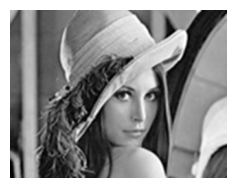

In [90]:
# 画像の読み込み & グレースケールに変換
img = Image.open('../imgs/girl.jpg').convert('L')
a = np.array(img)
show(2,1,1,a)

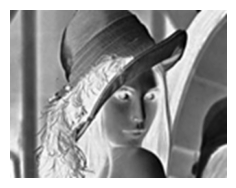

In [91]:
a_inv = 255 - a #反転
show(2,1,1,a_inv)

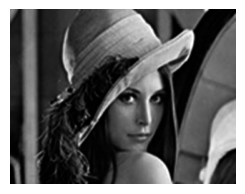

In [93]:
#ガマ変換
a_gama = 255*(a/255.0)**2
show(1,2,1,a_gama)

In [96]:
def threshold_otsu(gray, min_value=0, max_value=255):
    
    # ヒストグラムの算出
    hist = [np.sum(gray == i) for i in range(256)]

    s_max = (0,-10)

    for th in range(256):
        
        # クラス1とクラス2の画素数を計算
        n1 = sum(hist[:th])
        n2 = sum(hist[th:])
        
        # クラス1とクラス2の画素値の平均を計算
        if n1 == 0 : mu1 = 0
        else : mu1 = sum([i * hist[i] for i in range(0,th)]) / n1   
        if n2 == 0 : mu2 = 0
        else : mu2 = sum([i * hist[i] for i in range(th, 256)]) / n2

        # クラス間分散の分子を計算
        s = n1 * n2 * (mu1 - mu2) ** 2

        # クラス間分散の分子が最大のとき、クラス間分散の分子と閾値を記録
        if s > s_max[1]:
            s_max = (th, s)
    
    # クラス間分散が最大のときの閾値を取得
    t = s_max[0]

    # 算出した閾値で二値化処理
    gray[gray < t] = min_value
    gray[gray >= t] = max_value

    return gray

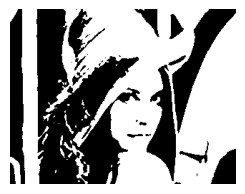

In [95]:
otsu = threshold_otsu(a)
show(1,2,1,otsu)

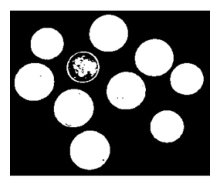

In [150]:
img = Image.open('imgs/coin.jpg').convert('L')
a = np.array(img)
show(2,1,1,a)

In [151]:
def dilation(img):
  w, h = img.size
  image_pixcels = np.array(list(img.getdata())).reshape(h, w,)
  filtered_pixcels = np.zeros((h, w,))
  for x in range(w):
    for y in range(h):
      x1 = max(0, x - 1)
      x2 = min(x + 1, w -1)
      y1 = max(0, y - 1)
      y2 = min(y + 1, h - 1)
      if (image_pixcels[y1:y2 + 1, x1:x2 + 1] == 255).any():
        filtered_pixcels[y][x] = 255
      else:
        filtered_pixcels[y][x] = 0
  filtered_img = Image.new('L', (w, h))
  filtered_img.putdata(filtered_pixcels.reshape(w * h, 1).flatten())
  return filtered_img


In [155]:
def erosion(img):
  w, h = img.size
  image_pixcels = np.array(list(img.getdata())).reshape(h, w, 1)
  filtered_pixcels = np.zeros((h, w,))
  for x in range(w):
    for y in range(h):
      x1 = max(0, x - 1)
      x2 = min(x + 1, w -1)
      y1 = max(0, y - 1)
      y2 = min(y + 1, h - 1)
      if (image_pixcels[y1:y2 + 1, x1:x2 + 1] == 0).any():
        filtered_pixcels[y][x] = 0
      else:
        filtered_pixcels[y][x] = 255
  filtered_img = Image.new('L', (w, h))
  filtered_img.putdata(filtered_pixcels.reshape(w * h, 1).flatten())
  return filtered_img

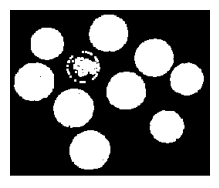

In [161]:
img_dilation = dilation(img)
a_flatten = np.array(img_dilation)
show(2,1,1,a_flatten)

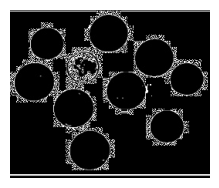

In [163]:
edge = a_flatten - a
show(2,1,1,edge)

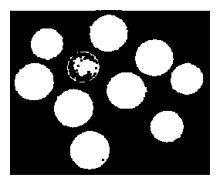

In [166]:
img_erosion = erosion(img)
a_erosion = np.array(img_erosion)
show(2,1,1,a_erosion)

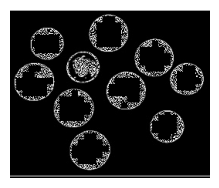

In [167]:
edge = a - a_erosion
show(2,1,1,edge)